###### Introduction

Goal of this notebook is to perform EDA & clustering using k-means on the customer segmentation data to be able to learn the market basket analysis.

To know more about customer segmentation, please check this out: https://www.qualtrics.com/experience-management/brand/customer-segmentation/#:~:text=Customer%20segmentation%20is%20the%20process,of%20building%20a%20marketing%20persona.

The problem and dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

References:

https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/


In [ ]:
# -*- coding: utf-8 -*-
# importing required libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

In [ ]:
# Creating data frame and ingesting the data from .csv file into the data frame
df = pd.read_csv('C:/Users/rm634391/Analytics/Kaggle/CustomerSegmentation/Mall_Customers.csv')

###### Understanding the dataset (Descriptive Statistics)

This helps when we want to cluster the target (focused) group later.

In [292]:
# Printing few rows of the data frame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Printing the number of rows & number of columns in data frame
df.shape

In [ ]:
# Printing data types of each column
datatypes = df.dtypes
datatypes

In [ ]:
# Printing the information about the data frame 
df.info()

In [ ]:
# Counting total null values in the data frame
df.isnull().sum()

In [ ]:
# Counting null values in the data frame by rows
for i in range(len(df.index)) :
    print(" Total NaN in row", i + 1, ":",
          df.iloc[i].isnull().sum())

In [289]:
# Simple statistics of the data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


###### Below steps are to convert data types

In [ ]:
# Data type conversion (CustomerID is stored as integer, we can convert it into string)
df['Gender'] = df['Gender'].astype('str')
df['CustomerID'] = df['CustomerID'].astype('str')
dtype = df.dtypes
dtype

In [ ]:
df.info()

###### Data Visualization

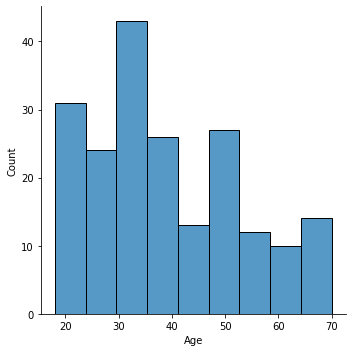

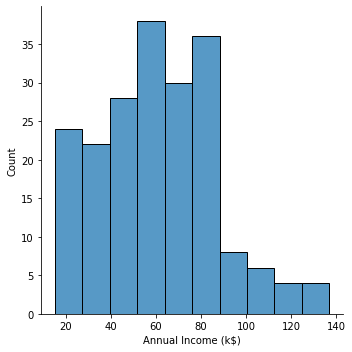

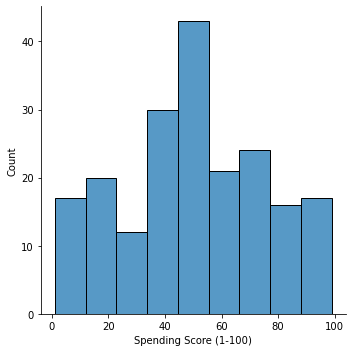

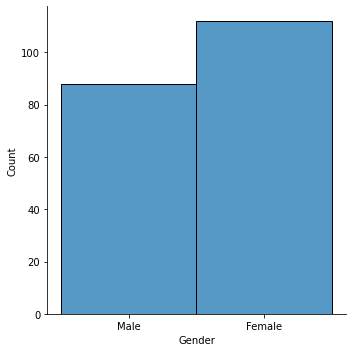

In [290]:
# Let us understand the distribution of each attributes (age, annual income & spending score)

# Distribution of age
sn.displot(data=df, x="Age", kind="hist", aspect=1)

# Distribution of Annual Income
sn.displot(data=df, x="Annual Income (k$)", kind="hist", aspect=1)


# Distribution of Spending Score
sn.displot(data=df, x="Spending Score (1-100)", kind="hist", aspect=1)

# Distribution of Gender
sn.displot(data=df, x="Gender", kind="hist", aspect=1)

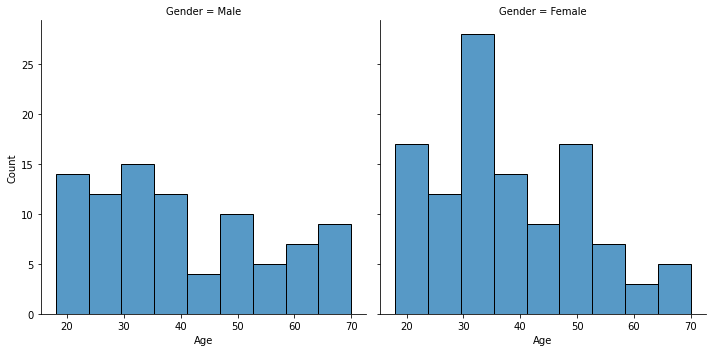

In [291]:
# Let us understand the distribution of each attributes (age) with another dimension Gender

# Distribution of age with column
sn.displot(data=df, x="Age", col="Gender", kind="hist", aspect=1)

###### Correlation (Diagnostic Analytics)

In [293]:
# Correlation Analysis
# We can exclude CustomerID from the data frame
df = df.loc[:, df.columns != 'CustomerID']

<AxesSubplot:>

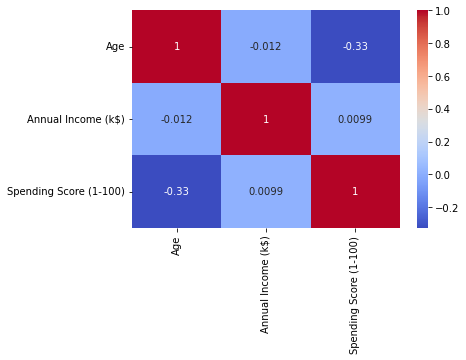

In [294]:
# Checking for correlation

# Creating a correlation matrix from the data frame
corrMatrix = df.corr()

# Plotting using heatmap
sn.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

The above correlation depicts weak relationship between Annual income & spending score. Also there is negative correlation between age & spending score (with a score of .33)

In [295]:
# Correlation using kendall method
df.corr(method ='kendall')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.008198,-0.210757
Annual Income (k$),0.008198,1.000000,-0.000765
Spending Score (1-100),-0.210757,-0.000765,1.000000


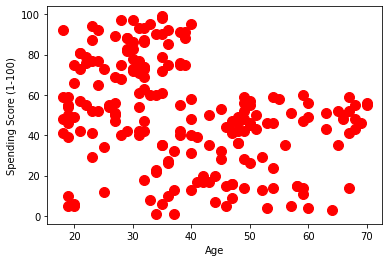

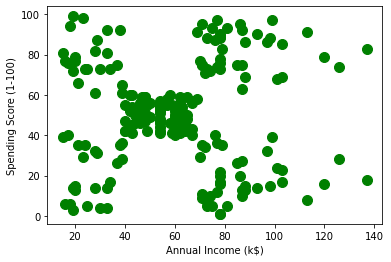

In [298]:
# Scatter plot for two variables
# plot of Age & Spending Score
df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)', s = 100, c = 'red');

# plot of Annual Income & Spending Score
df.plot.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', s = 100, c = 'green');

###### Clustering using K-Means

In [299]:
# Selecting data frame only with numeric. Hence removing the 'Gender' column from data frame
df = df.loc[:, df.columns != 'Gender']

Before performing k-means clustering, we need to find the optimal k (number of clusters). We will be leveraging Elbow method to find the optimal k

In [300]:
# distortions:  the average of the squared distances from the cluster centers of the respective clusters. 
# Inertia: the sum of squared distances of samples to their closest cluster center.

# objective: To find the optimal cluster K

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)

    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /df.shape[0]
    mapping2[k] = kmeanModel.inertia_



C:\Users\rm634391\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rm634391\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


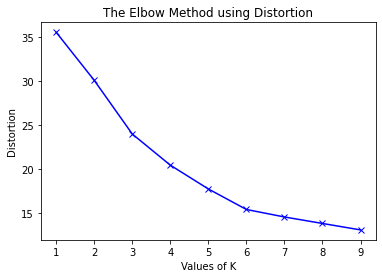

In [301]:
# Plotting the distortions to find optimal k

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Based on above the optimal K seems to be 6. We can use Silhouette value Method to find the value of ‘k’

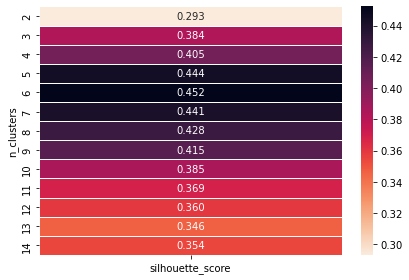

In [302]:
# Below is for identifying optimal k based on silhouette

clusters_range = range(2,15)
results =[]
for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters=c,n_init=100, random_state=0)
    cluster_lables = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_lables)
    results.append([c, silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sn.heatmap(pivot_km, annot=True, linewidths=0.5, fmt='.3f', cmap=sn.cm.rocket_r)
plt.tight_layout()

Now that we know there are 6 clusters let us try to apply the algorithm with k=6 to our dataset

In [303]:
kmeans_selection = KMeans(init='k-means++', n_clusters=6,n_init=100, random_state=1).fit(df)
labels = pd.DataFrame(kmeans_selection.labels_)
clustered_data = df.assign(Cluster=labels)

#scatters(clustered_data, h='Cluster')

grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,27.0,56.7,49.1
1,41.7,88.2,17.3
2,32.7,86.5,82.1
3,56.2,53.4,49.1
4,44.1,25.1,19.5
5,25.3,25.7,79.4


###### Conclusion

With above analysis, we are able to form six clusters:

Cluster 1 & 4: Age group 40-50, despite of annual income, the spending score is less
Cluster 0: Young age group with average annual income has an average spending score
Cluster 5: Young age group with low annual income has a higher spending score
Cluster 3: Elderly age group with average income has an average spending score
Cluster 2: Middle age group with 75% of annual income has the highest spending score of all (most likely our target group).

Hence our target would be Cluster 2 & Cluster 5
